## Combine Data Exploration and Cleaning

Columns ID, Sequence, Parent Email, Parent First, Parent Last, Parent Phone, '60, 3-Cone (duplicate), Jersey, 5, and  3Cone-P are all blank. Each column was removed before exporting.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

combine = pd.read_csv("/Users/alexpugh/UConn 2024 Spring/Football/data/ZBK Data - National Combine.csv")

In [3]:
combine.columns

Index(['CLASS', 'Center number', 'Athlete_Number', 'RegID', 'Event Date',
       'First Name', 'Last Name', 'Email', 'Link', 'Expanded', 'GIF1', 'GIF2',
       'Sport', 'Team', 'Compare Position', 'Position', 'Unnamed: 16', 'Age',
       'DOB', 'Class', 'Grade', 'Parent name', 'School', 'School City',
       'School State', 'Street 1', 'Street 2', 'City', 'State', 'Zipcode',
       'Cell Phone', 'Parent Phone', 'Parent Phone.1', 'Other',
       'Parent Address', 'Parent City', 'Parent State', 'Record_Number',
       'Height', 'Weight', 'Wingspan', 'Hand Span', 'Reach', '10', '20', '40',
       'MPH', '5-10-5:10', '5-10-5:20', '3-Cone', 'VJ:Max', 'VJ:VJ',
       'Broad Jump', '40 P', 'VJ-P', 'BJ-P', 'Shuttle-P', 'Total P',
       'PI Grade', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [4]:
# Subsetting dataframe without private information 

columns_to_drop = ['Email', 'Parent name', 'Street 1', 'Street 2', 'Cell Phone', 'Parent Phone', 'Parent Phone.1', 'Parent Address']
football_df = combine.drop(columns=columns_to_drop)

In [5]:
football_df.columns

Index(['CLASS', 'Center number', 'Athlete_Number', 'RegID', 'Event Date',
       'First Name', 'Last Name', 'Link', 'Expanded', 'GIF1', 'GIF2', 'Sport',
       'Team', 'Compare Position', 'Position', 'Unnamed: 16', 'Age', 'DOB',
       'Class', 'Grade', 'School', 'School City', 'School State', 'City',
       'State', 'Zipcode', 'Other', 'Parent City', 'Parent State',
       'Record_Number', 'Height', 'Weight', 'Wingspan', 'Hand Span', 'Reach',
       '10', '20', '40', 'MPH', '5-10-5:10', '5-10-5:20', '3-Cone', 'VJ:Max',
       'VJ:VJ', 'Broad Jump', '40 P', 'VJ-P', 'BJ-P', 'Shuttle-P', 'Total P',
       'PI Grade', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64'],
      dtype='object')

In [6]:
# Naming Sex column
football_df.rename(columns={'Unnamed: 16': 'Sex'}, inplace=True)

In [7]:
football_df['Sex'].nunique()

1

In [8]:
# Checking for NaN values in Unnamed columns

nan_columns = ['Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64']

for column in nan_columns:
    nan_values = football_df[column].isna().sum()
    print(f"Number of NaN values in column '{column}': {nan_values}")


Number of NaN values in column 'Unnamed: 59': 4437
Number of NaN values in column 'Unnamed: 60': 4437
Number of NaN values in column 'Unnamed: 61': 4437
Number of NaN values in column 'Unnamed: 62': 4436
Number of NaN values in column 'Unnamed: 63': 4436
Number of NaN values in column 'Unnamed: 64': 4436


In [9]:
# Drop empty columns
columns_to_drop = ['Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64']
football_df = football_df.drop(columns=columns_to_drop)

In [10]:
# Convert event date to datetime
football_df["Event Date"] = pd.to_datetime(football_df["Event Date"])

In [11]:
# Check if Compare Position column is redundant with Position
same_position = (football_df['Compare Position'] == football_df['Position']).all()
same_position

False

In [12]:
# Comparing Compare Position column w Position column
mismatched_positions = football_df[football_df['Compare Position'] != football_df['Position']]

print("Rows where 'Compare Position' is not the same as 'Position':")
print(mismatched_positions)

# Replace empty or NaN values of 'Positon' with values from 'Compare Position'
football_df["Position"].fillna(football_df["Compare Position"], inplace=True)

Rows where 'Compare Position' is not the same as 'Position':
      CLASS  Center number            Athlete_Number  \
542    2024            NaN      323700_Tristan_White   
573    2022          415.0      415363_Blake_Griffin   
749    2023            NaN     371628_Zhakius_Thomas   
1096   2022          369.0  369684_Fletcher_Westphal   
1097   2022          369.0     369541_Raymond_Pulido   
...     ...            ...                       ...   
3703   2017            NaN                       B99   
3762   2017            NaN                      B512   
3856   2016            NaN                       696   
3879   2016            NaN                        88   
4267   2016            NaN                        52   

                         RegID Event Date First Name Last Name  \
542                        NaN 2024-01-05    Tristan     White   
573                        NaN 2022-04-30      Blake   Griffin   
749                        NaN 2023-01-06    Zhakius    Thomas   
10

/var/folders/8b/vnb3p0z124j87t4bjjq_4j300000gn/T/ipykernel_95987/3409192413.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  football_df["Position"].fillna(football_df["Compare Position"], inplace=True)


In [13]:
football_df = football_df.drop(columns=["Compare Position"])

In [14]:
football_df.describe()

,CLASS,Center number,Event Date,GIF2,Grade,Record_Number,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,MPH,VJ:Max,VJ:VJ,40 P,VJ-P,BJ-P,Shuttle-P,Total P,PI Grade
count,4437.000000,1001.000000,4437,1046.000000,2175.000000,1092.000000,4411.000000,4351.000000,4398.000000,2742.000000,3211.000000,4368.000000,4368.000000,4368.000000,504.000000,3243.000000,4174.000000,4134.000000,4062.000000,4076.00000,3553.000000,3864.000000,3864.000000
mean,2019.831192,842.112887,2019-11-04 14:58:39.675456512,8.632887,10.514023,6215.760073,68.881290,199.653220,70.517970,8.675246,91.376088,1.852764,3.039613,5.226765,18.952103,118.612088,27.730867,42.759509,48.476598,45.12433,49.780467,171.736509,42.934928
min,2016.000000,369.000000,2016-01-06 00:00:00,0.000000,0.000000,1823.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000,1.685000,4.322000,10.340000,0.000000,0.000000,0.000000,-211.130000,-22.73000,10.000000,0.000000,0.000000
25%,2017.000000,369.000000,2017-01-05 00:00:00,0.000000,10.000000,2404.250000,69.300000,169.000000,71.000000,8.750000,89.000000,1.753000,2.883000,4.940000,18.185000,116.000000,24.940000,37.480000,42.922500,39.69000,43.000000,156.000000,38.910000
50%,2019.000000,369.000000,2019-01-05 00:00:00,14.000000,11.000000,3000.500000,71.500000,189.000000,73.800000,9.250000,92.000000,1.822000,2.983000,5.122500,19.255000,119.500000,28.000000,42.405000,50.060000,44.80000,49.000000,181.000000,45.275000
75%,2022.000000,1336.000000,2022-01-06 00:00:00,16.000000,11.000000,10338.750000,73.500000,224.000000,76.000000,9.500000,95.000000,1.925000,3.150000,5.429000,19.997500,122.500000,31.000000,47.207500,57.405000,50.51500,56.000000,205.000000,51.195000
max,2024.000000,1745.000000,2024-01-05 00:00:00,18.000000,12.000000,11743.000000,80.800000,385.000000,91.020000,11.250000,114.000000,4.177000,5.348000,7.571000,22.100000,135.500000,45.500000,100.000000,100.000000,100.00000,90.000000,311.000000,77.670000
std,2.722289,513.443738,NaN,7.691605,1.057527,3972.443395,13.983117,52.272694,15.748505,2.245939,8.555275,0.173400,0.244415,0.414172,1.507736,10.126140,4.883087,8.993405,22.193195,8.83155,9.282794,55.370057,13.841553


In [15]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4437 entries, 0 to 4436
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CLASS           4437 non-null   int64         
 1   Center number   1001 non-null   float64       
 2   Athlete_Number  4437 non-null   object        
 3   RegID           2461 non-null   object        
 4   Event Date      4437 non-null   datetime64[ns]
 5   First Name      4431 non-null   object        
 6   Last Name       4431 non-null   object        
 7   Link            2114 non-null   object        
 8   Expanded        1584 non-null   object        
 9   GIF1            1075 non-null   object        
 10  GIF2            1046 non-null   float64       
 11  Sport           1961 non-null   object        
 12  Team            1590 non-null   object        
 13  Position        4437 non-null   object        
 14  Sex             573 non-null    object        
 15  Age 

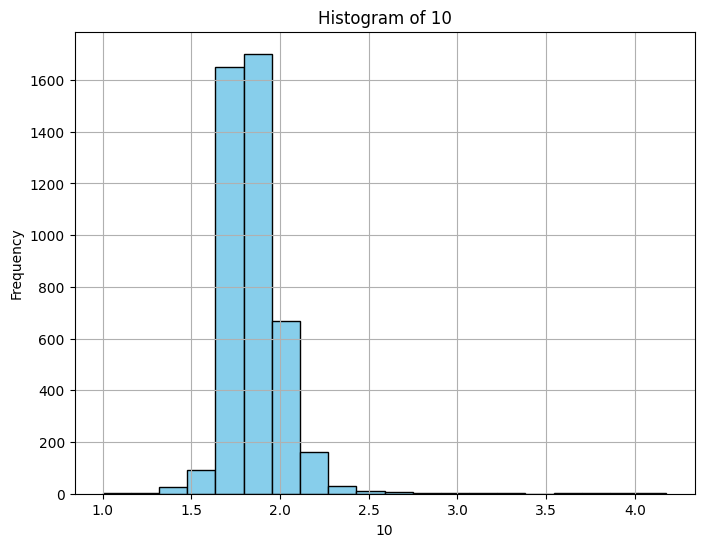

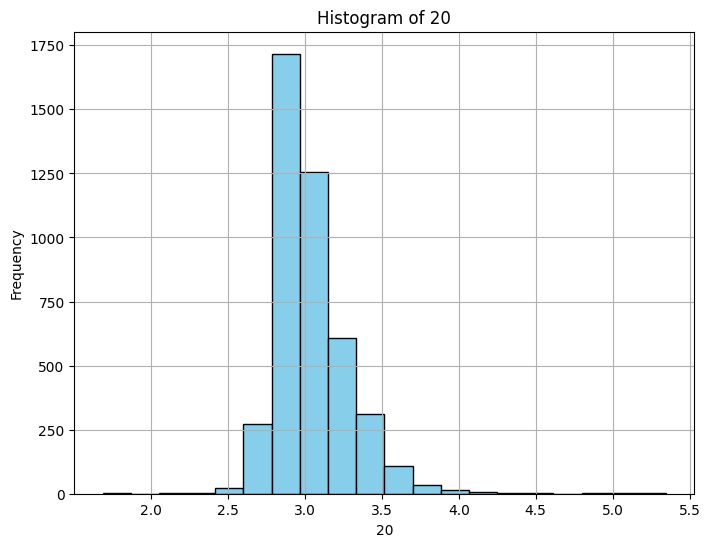

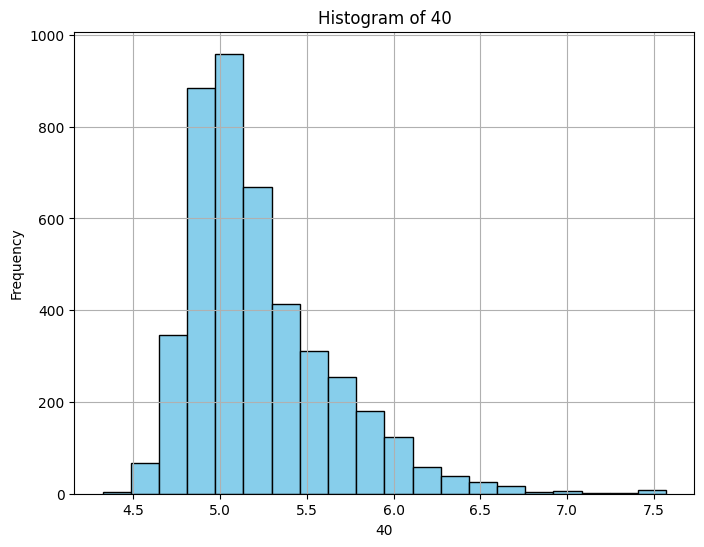

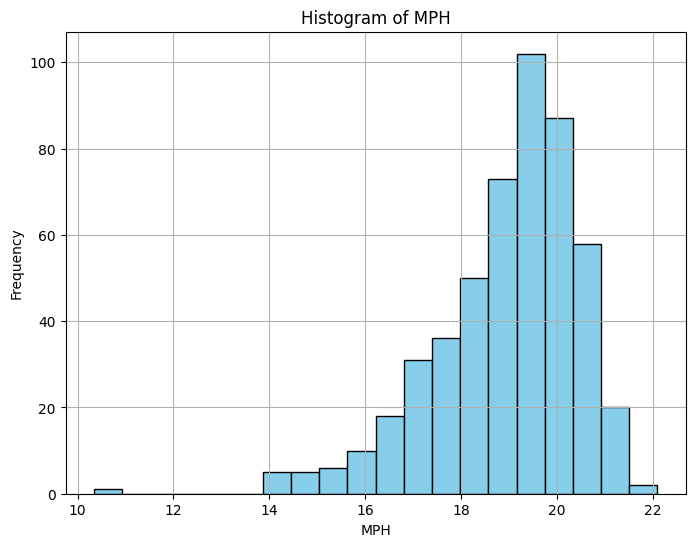

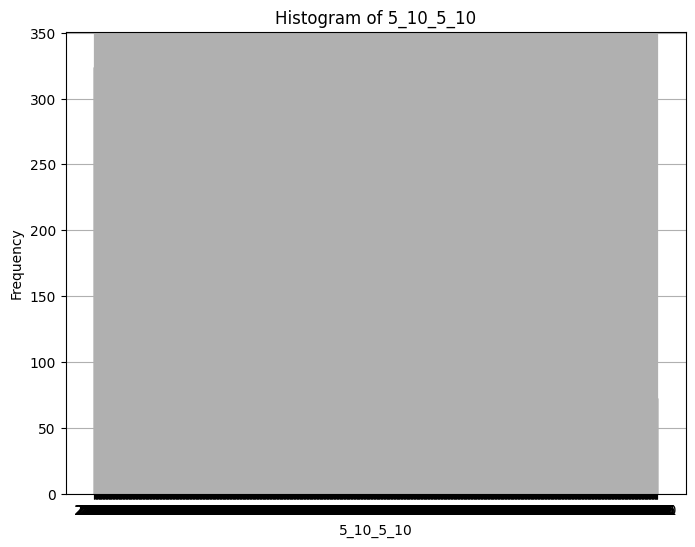

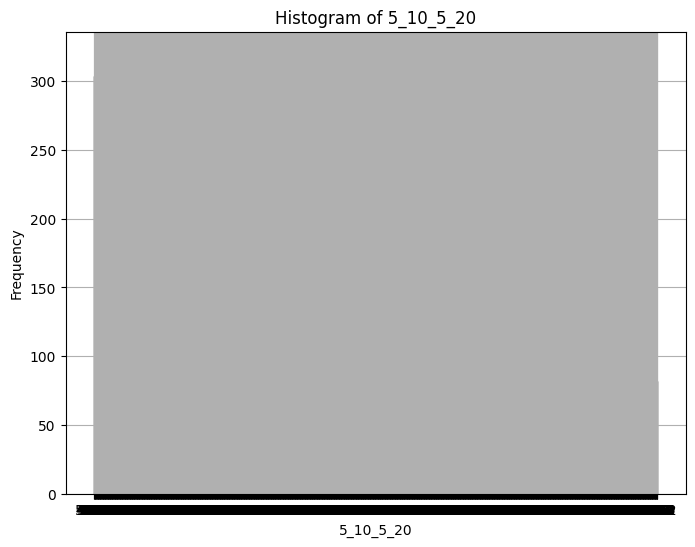

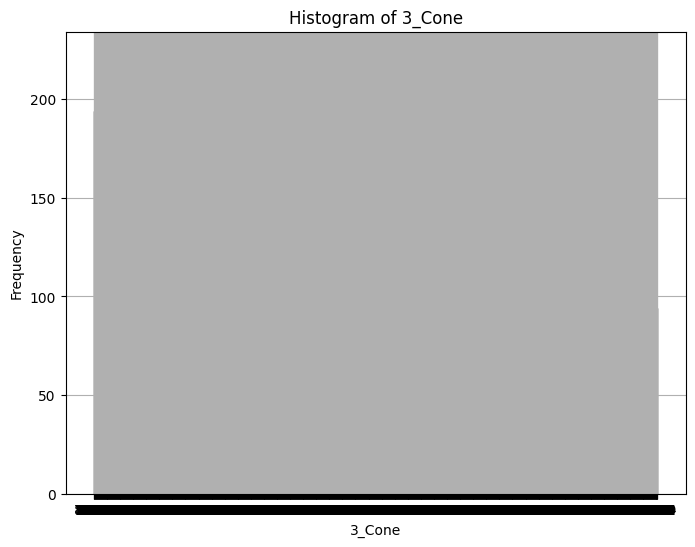

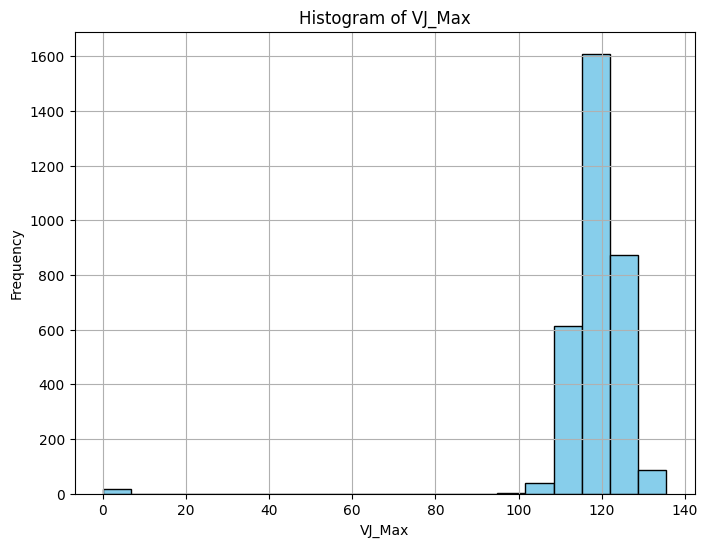

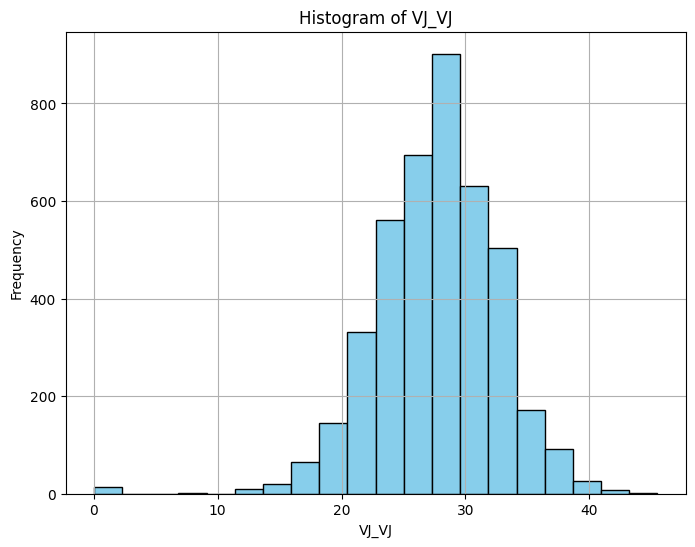

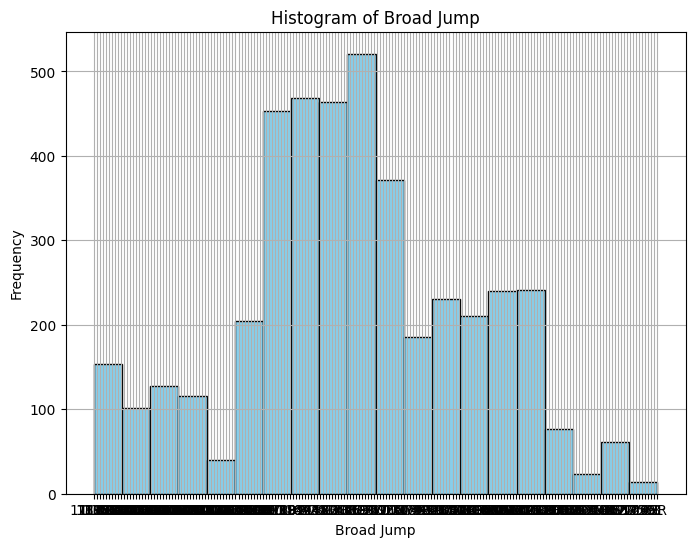

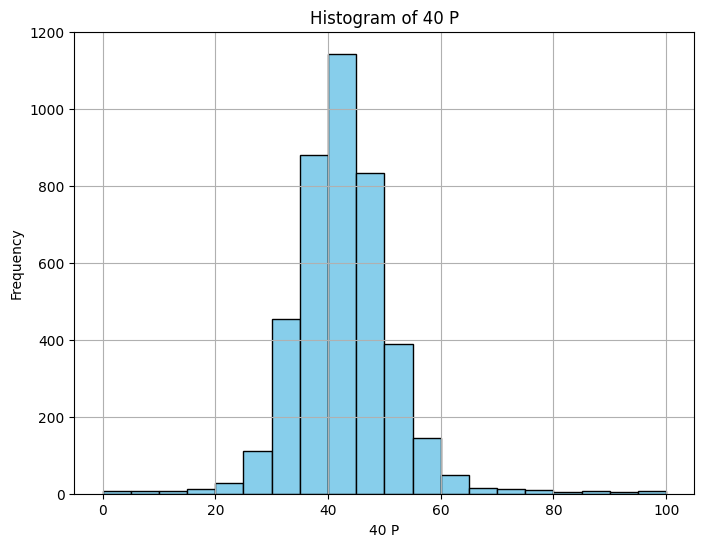

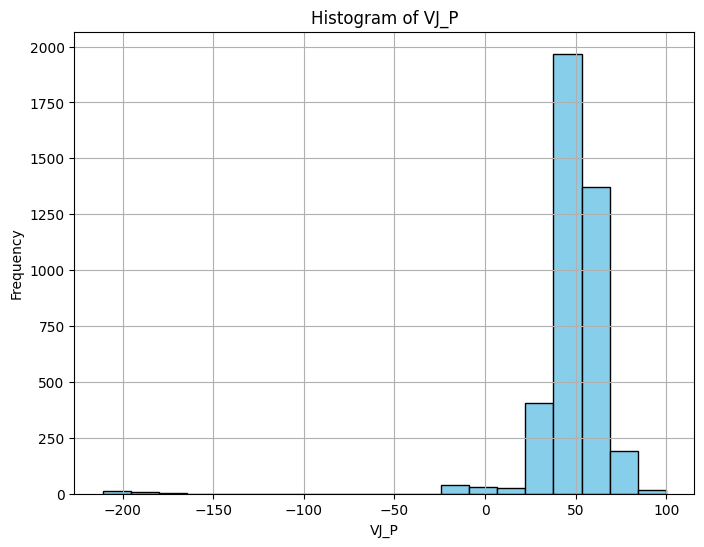

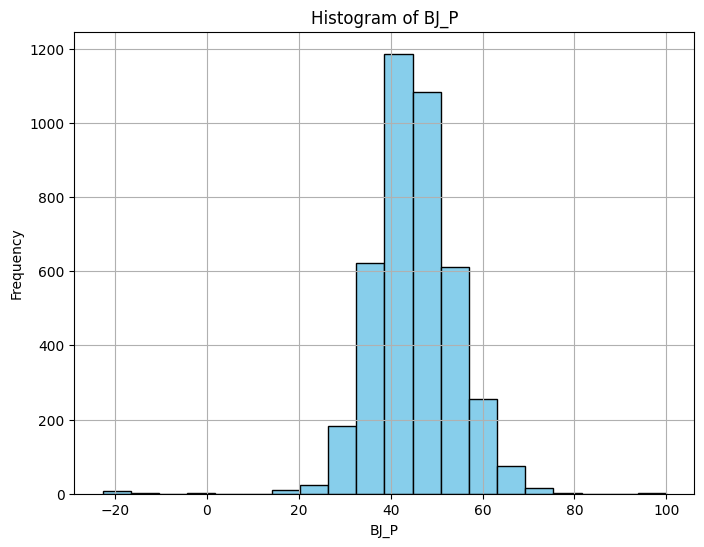

In [16]:
import matplotlib.pyplot as plt

football_df.replace("DQ", pd.NA, inplace=True)

# Replace special characters in column names
football_df.columns = football_df.columns.str.replace(':', '_').str.replace('-', '_')

columns_to_plot = ['10', '20', '40', 'MPH', '5_10_5_10', '5_10_5_20', '3_Cone', 'VJ_Max', 'VJ_VJ', 'Broad Jump', '40 P', 'VJ_P', 'BJ_P']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    data_to_plot = football_df[column].dropna()
    plt.hist(data_to_plot, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [17]:
football_df

,CLASS,Center number,Athlete_Number,RegID,Event Date,First Name,Last Name,Link,Expanded,GIF1,GIF2,Sport,Team,Position,Sex,Age,DOB,Class,Grade,School,School City,School State,City,State,Zipcode,Other,Parent City,Parent State,Record_Number,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,MPH,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade
0,2024,NaN,372001_Milo_Abercrombie,NaN,2024-01-05,Milo,Abercrombie,https://media.zybeksports.com/372/372001_Milo_...,NaN,NaN,NaN,NaN,NaN,WR,M,16.9,2/12/2007,2025,11.0,NaN,Victoria,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.50,300.0,77.25,9.250,92.50,1.758,2.920,5.042,19.28,2.451,4.69,NaN,118.5,28.75,111.00,42.77,45.90,44.92,NaN,NaN,NaN
1,2024,NaN,372002_Oluwatolani_Adegorusi,NaN,2024-01-05,Oluwatolani,Adegorusi,https://media.zybeksports.com/372/372002_Oluwa...,NaN,NaN,NaN,NaN,NaN,OL,M,15.4,8/8/2008,2026,10.0,NaN,Springdale,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.75,175.0,75.50,8.750,93.00,1.996,3.291,5.726,16.80,2.959,5.384,NaN,114.5,22.00,78.00,50.09,67.42,57.19,NaN,NaN,NaN
2,2024,NaN,372003_Juan-Milleon_Aguilar,NaN,2024-01-05,Juan-Milleon,Aguilar,https://media.zybeksports.com/372/372003_Juan-...,NaN,NaN,NaN,NaN,NaN,DB,M,17.4,8/3/2006,2025,11.0,NaN,Dallas,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.20,130.0,63.75,8.250,82.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,32.00,118.00,NaN,52.63,48.99,NaN,NaN,NaN
3,2024,NaN,372004_Chad_Aguillard,NaN,2024-01-05,Chad,Aguillard,https://media.zybeksports.com/372/372004_Chad_...,NaN,NaN,NaN,NaN,NaN,WR,M,14.9,1/29/2009,2027,9.0,NaN,Livonia,LA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.80,180.0,75.25,8.750,90.75,1.736,2.846,4.893,19.98,2.351,4.633,NaN,112.5,30.00,110.00,32.99,41.30,38.66,NaN,NaN,NaN
4,2024,NaN,372006_Davinci_Allen,NaN,2024-01-05,Davinci,Allen,https://media.zybeksports.com/372/372006_Davin...,NaN,NaN,NaN,NaN,NaN,DB,M,17.0,1/25/2007,2025,11.0,NaN,Woodstock,GA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.50,190.0,73.25,9.500,91.75,1.704,2.832,4.862,20.15,2.515,4.706,NaN,127.0,36.25,115.00,48.31,61.93,47.65,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,2016,NaN,184,207,2016-01-06,Alex,Foster,NaN,NaN,NaN,NaN,NaN,NaN,LB,NaN,NaN,NaN,2017,NaN,Noblesville High School,Noblesville,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.50,NaN,71.80,9.250,NaN,1.776,2.885,5.001,NaN,2.400,4.612,7.064,NaN,31.50,109,NaN,NaN,NaN,NaN,0.0,0.0
4433,2016,NaN,44,573,2016-01-06,Mekhi,Becton,NaN,NaN,NaN,NaN,NaN,NaN,OL,NaN,NaN,NaN,2017,NaN,Highland Springs High School,Highland Springs,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.00,NaN,80.00,10.875,NaN,1.960,2.243,6.107,NaN,2.615,5.290,8.307,NaN,28.50,78,NaN,NaN,NaN,NaN,0.0,0.0
4434,2016,NaN,113,92,2016-01-06,Jack,Coan,NaN,NaN,NaN,NaN,NaN,NaN,QB,NaN,NaN,NaN,2017,NaN,Sayville High School,West Sayville,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.80,NaN,74.80,9.750,NaN,1.756,2.928,5.002,NaN,2.404,4.524,7.382,NaN,35.00,102,NaN,NaN,NaN,NaN,0.0,0.0
4435,2016,NaN,329,420,2016-01-06,Devon,Lawrence,NaN,NaN,NaN,NaN,NaN,NaN,RB,NaN,NaN,NaN,2018,NaN,Wakeforest High School,Wakeforest,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.740,2.812,4.806,NaN,2.340,4.468,7.165,NaN,37.50,111,NaN,NaN,NaN,NaN,0.0,0.0


In [18]:
All_Conference = pd.read_csv("data/All Conference Players.csv", encoding='latin1')
All_Conference = All_Conference[["Position", "Name"]]

In [19]:
# Remove leading spaces from the "Name" column
All_Conference['Name'] = All_Conference['Name'].str.lstrip()

# Split the "Name" column into "First Name" and "Last Name"
All_Conference[['First Name', 'Last Name']] = All_Conference['Name'].str.split(' ', n=1, expand=True)

In [20]:
All_Conference

,Position,Name,First Name,Last Name
0,Quarterback,Dequan Finn,Dequan,Finn
1,Offensive Lineman,Corey Stewart,Corey,Stewart
2,Offensive Lineman,Nolan Potter,Nolan,Potter
3,Offensive Lineman,Nick Rosi,Nick,Rosi
4,Offensive Lineman,Vinny Sciury,Vinny,Sciury
...,...,...,...,...
2253,DB,Jalen Walker,Jalen,Walker
2254,DB,Tariq Thompson,Tariq,Thompson
2255,DB,Jericho Flowers,Jericho,Flowers
2256,P,Tyson Dyer,Tyson,Dyer


In [37]:
# Step 1: Remove duplicates in All_Conference based on Name
All_Conference_unique = All_Conference.drop_duplicates(subset='Name')

# Step 2: Merge football_df and All_Conference_unique on First Name and Last Name
Combine_All_Conference = pd.merge(football_df, All_Conference_unique, on=['First Name', 'Last Name'], how='inner')


In [38]:
Combine_All_Conference

,CLASS,Center number,Athlete_Number,RegID,Event Date,First Name,Last Name,Link,Expanded,GIF1,GIF2,Sport,Team,Position_x,Sex,Age,DOB,Class,Grade,School,School City,School State,City,State,Zipcode,Other,Parent City,Parent State,Record_Number,Height,Weight,Wingspan,Hand Span,Reach,10,20,40,MPH,5_10_5_10,5_10_5_20,3_Cone,VJ_Max,VJ_VJ,Broad Jump,40 P,VJ_P,BJ_P,Shuttle_P,Total P,PI Grade,Position_y,Name
0,2024,NaN,372065_Brandon_Brown,NaN,2024-01-05,Brandon,Brown,https://media.zybeksports.com/372/372065_Brand...,NaN,NaN,NaN,NaN,NaN,WR,M,17.1,12/4/2006,2025,11.0,NaN,Cypress,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.50,170.0,73.00,9.250,91.00,1.788,2.920,4.983,19.83,2.315,4.567,NaN,122.0,26.75,118.00,41.12,40.98,48.10,NaN,NaN,NaN,DT,Brandon Brown
1,2024,NaN,372572_Jalen_White,NaN,2024-01-05,Jalen,White,https://media.zybeksports.com/372/372572_Jalen...,NaN,NaN,NaN,NaN,NaN,LB,M,16.6,6/7/2007,2025,11.0,NaN,Flossmoor,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.50,190.0,70.75,8.250,86.25,1.937,3.137,5.453,17.66,2.826,5.226,NaN,119.5,27.00,108.00,40.19,54.52,53.93,NaN,NaN,NaN,RB,Jalen White
2,2023,NaN,371294_Anthony_Jones,NaN,2023-01-06,Anthony,Jones,https://media.zybeksports.com/371/371294_Antho...,https://media.zybeksports.com/371/C/371294_Ant...,White 117,0.0,Alabama,Mobile,LB,NaN,14.98001894,1/14/2008,2026,9.0,Shanitha/Anthony White/Jones,Alabama,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.77,216.0,78.50,9.000,97.61,1.800,2.977,5.112,NaN,2.280,4.634,NaN,128.0,30.39,109,49.18,58.21,51.35,56.0,214.0,53.58,RB,Anthony Jones
3,2020,NaN,3001194_Brylan_Green_DB,NaN,2020-01-03,Brylan,Green,NaN,NaN,NaN,NaN,Football,NaN,DB,NaN,15.66575342,5/6/2004,2022,11.0,NaN,Lafayette Christian,Lafayette,NaN,Opelousas,LA,brylangreen30@gmail.com,NaN,NaN,2229.0,68.80,159.0,72.00,NaN,90.00,1.732,2.810,4.810,NaN,2.064,4.111,7.302,121.5,31.50,113.0,40.63,48.78,43.82,59.0,192.0,47.96,DB,Brylan Green
4,2020,NaN,3001580_Anthony_Wilson_OL,NaN,2020-01-03,Anthony,Wilson,NaN,NaN,NaN,NaN,Football,NaN,OL,NaN,16.44931507,7/25/2003,2021,11.0,NaN,Rains,Emory,NaN,Point,TX,wilsona2021@rainsisd.org,NaN,NaN,3023.0,76.50,260.0,78.00,NaN,99.00,2.040,3.416,6.028,NaN,2.830,5.303,9.031,118.0,19.00,85.0,40.66,44.70,46.00,45.0,176.0,44.00,DB,Anthony Wilson
5,2019,NaN,21050962_Marcus_Houston,NaN,2019-01-05,Christian,Sims,NaN,NaN,NaN,NaN,NaN,NaN,QB,NaN,NaN,NaN,2020,NaN,Eisenhower,Houston,Texas,United States,8530 Observatory<br>Houston. Texas 77088<br>Un...,37298,NaN,NaN,NaN,NaN,0.00,198.0,0.00,0.000,91.00,1.824,2.922,4.995,NaN,2.689,5.037,8.552,117.0,26.00,88,NaN,NaN,NaN,NaN,0.0,0.00,Tight End,Christian Sims
6,2019,NaN,20051257_Matt_Sykes,21051092,2019-01-05,Elijah,Metcalf,NaN,NaN,NaN,NaN,NaN,NaN,RB,NaN,NaN,NaN,2021,NaN,Mallard Creek High School,Charlorte,North Carolina,United States,11809 Mourning Dove Lane<br>Charlorte. North C...,37670,NaN,NaN,NaN,NaN,75.50,194.0,74.50,9.250,91.00,1.770,2.875,4.864,NaN,2.307,4.342,7.532,126.0,35.00,106,46.45,60.29,42.92,61.0,210.0,52.59,WR,Elijah Metcalf
7,2019,NaN,02050930_Elijah_Hart,20050835,2019-01-05,Jordan,Dunbar,NaN,NaN,NaN,NaN,NaN,NaN,DB,NaN,NaN,NaN,2020,NaN,Iona Prep,Tarrytown,New York,United States,94 Main Street<br>Tarrytown. New York 10591<br...,37225,NaN,NaN,NaN,NaN,72.00,176.0,73.00,9.500,87.00,1.784,2.907,5.037,NaN,2.098,4.277,7.593,126.5,39.50,107,41.16,67.37,41.90,58.0,208.0,52.01,DB,Jordan Dunbar
8,2019,NaN,20050925_Jalen_Harrell,NaN,2019-01-05,Montrell,Johnson,NaN,NaN,NaN,NaN,NaN,NaN,RB,NaN,NaN,NaN,2021,NaN,De La Salle,New Orleans,Louisiana,United States,5530 Samovar Dr.<br>New Orleans. Louisiana 701...,37542,NaN,NaN,NaN,NaN,74.00,181.0,78.50,9.250,93.00,1.856,2.959,4.979,NaN,2.562,4.748,7.687,123.0,30.00,103,37.59,47.60,39.23,43.0,168.0,41.93,RB,Montrell Johnson
9,2019,NaN,Steven_Arellano,NaN,2019-01-05,Mose,Vavao,NaN,NaN,NaN,NaN,NaN,NaN,OL,NaN,NaN,NaN,2020,NaN,Saint Francis High School,Newark,California,United States,4902 Farnham dr<br>Newark. California 94560<br...,37200,NaN,NaN,NaN,NaN,68.50,201.0,70.00,9.000,78.00,1.881,3.065,5.282,NaN,2.548,4.576,7.507

In [44]:
Combine_All_Conference.to_csv('data/Combine_All_Conference.csv', index=False)